# Refugee Data Cleaning Mission

I have used data scraping software to collect the data from the following source: https://en.wikipedia.org/wiki/List_of_countries_by_refugee_population 

This source from wikipedia has two tables, refugees by their country of asylum and refugees by their country of origin.  
Key: N = Note; E = Explanation; G; Graphic

##### Importing and inspecting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
rpc = pd.read_csv("refugees_per_country.csv", encoding = "utf-8")

In [3]:
rpc.head(10)

,country name,number of refugees per 1000 people,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Afghanistan,7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
1,Albania,0.05,138,154,104,96,86,82,76,70,65,77
2,Algeria,2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
3,Angola,0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
4,Argentina,0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"
5,Armenia,5.22,"17,886","3,240","3,190","3,132","2,854","2,918","3,296","3,607","3,953","4,566"
6,Aruba,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
7,Australia,1.51,"42,188","35,582","35,582","34,503","30,083","23,434","21,805","22,548","20,919","22,164"
8,Austria,7.13,"93,250","60,747","60,747","55,598","51,730","47,073","42,630","38,906","37,557","30,773"
9,Azerbaijan,0.14,"1,193","1,357","1,299","1,380","1,468","1,730","1,891","1,642","2,061","2,352"


Observation: Showing the top portion of the table to get a feel for the data.

##### Data Cleaning

In [4]:
rpc.rename(columns = {"number of refugees per 1000 people": "Refugees per 1000"}, inplace = True)

In [5]:
rpc.head(5)

,country name,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
0,Afghanistan,7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
1,Albania,0.05,138,154,104,96,86,82,76,70,65,77
2,Algeria,2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
3,Angola,0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
4,Argentina,0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"


In [6]:
no_per_1000 = rpc[["country name", "Refugees per 1000"]]
print(no_per_1000)

    country name  Refugees per 1000
0    Afghanistan               7.14
1        Albania               0.05
2        Algeria               2.42
3         Angola               0.64
4      Argentina               0.08
..           ...                ...
177    Venezuela               5.68
178      Vietnam                NaN
179        Yemen              10.05
180       Zambia               1.64
181     Zimbabwe               0.40

[182 rows x 2 columns]


In [7]:
no_per_1000[no_per_1000["Refugees per 1000"].isnull()]

,country name,Refugees per 1000
6,Aruba,NaN
13,Barbados,NaN
16,Belize,NaN
22,British Virgin Islands,NaN
34,Colombia,NaN
62,Grenada,NaN
67,Haiti,NaN
68,Honduras,NaN
95,Macau,NaN
97,Madagascar,NaN


N: Checking for null values in the data.

In [8]:
rpc.iloc[178]

country name         Vietnam
Refugees per 1000        NaN
2016                     NaN
2015                     NaN
2014                     NaN
2013                     NaN
2012                     NaN
2011                     990
2010                   1,928
2009                   2,357
2008                   2,357
2007                   2,357
Name: 178, dtype: object

N: Looking into what data is missing from a randomly selected country.

In [9]:
total_fields = rpc.count()
print(total_fields)

country name         182
Refugees per 1000    160
2016                 168
2015                 169
2014                 170
2013                 169
2012                 167
2011                 169
2010                 163
2009                 161
2008                 156
2007                 156
dtype: int64


N: Since data is missing from 26 nations, this is small portion of the total set, therefore dropping those null values within is the best action to take.

In [10]:
rpc.dropna(inplace = True)

In [11]:
nan_rpc = rpc.isna()
nan_rpc.count() == True

country name         False
Refugees per 1000    False
2016                 False
2015                 False
2014                 False
2013                 False
2012                 False
2011                 False
2010                 False
2009                 False
2008                 False
2007                 False
dtype: bool

N: The dataset I am about to import now shows the percentage of a countries population which flee and the number of people who fled within a given year.

In [12]:
rbo = pd.read_csv("refugees_by_origin.csv", encoding = "utf8")

In [13]:
rbo.head(10)

,country name,percentage of population,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,Afghanistan,7.59,"2,596,270","2,556,502","2,586,152","2,664,436","3,054,709","1,905,804","1,817,913","1,909,911","2,107,519"
1,Albania,0.35,"10,158","10,103","12,568","13,551","14,772","15,711","15,006","15,340","14,080"
2,Algeria,0.01,"3,524","3,660","5,673","6,120","6,688","8,184","9,060","10,615","8,353"
3,Andorra,0.01,7,5,7,6,6,6,6,9,10
4,Angola,0.04,"9,484","10,286","19,258","128,664","134,858","141,021","171,393","186,155","206,501"
5,Antigua and Barbuda,0.06,53,49,45,32,30,28,26,25,19
6,Argentina,0.00,318,388,447,518,557,608,"1,047","1,171",894
7,Armenia,0.39,"11,848","11,998","15,934","16,486","17,546","18,000","16,336","15,436","14,918"
8,Australia,0.00,25,28,48,39,37,28,43,63,29
9,Austria,0.00,10,10,12,11,10,12,14,23,34


In [14]:
rbo.rename(columns = {"country name": "Country Name", 
                     "percentage of population": "Percentage of Population (%)", 
                     "2014": "Fleeing in (2014)", 
                     "2013": "Fleeing in (2013)", 
                     "2012": "Fleeing in (2012)", 
                     "2011": "Fleeing in (2011)", 
                     "2010": "Fleeing in (2010)", 
                     "2009": "Fleeing in (2009)", 
                     "2008": "Fleeing in (2008)", 
                     "2007": "Fleeing in (2007)", 
                     "2006": "Fleeing in (2006)"}, inplace = True)

In [15]:
rbo.set_index("Country Name", inplace = True)

In [16]:
total_fields = rbo.count()
print(total_fields)

Percentage of Population (%)    204
Fleeing in (2014)               202
Fleeing in (2013)               201
Fleeing in (2012)               198
Fleeing in (2011)               197
Fleeing in (2010)               194
Fleeing in (2009)               191
Fleeing in (2008)               193
Fleeing in (2007)               194
Fleeing in (2006)               193
dtype: int64


N: Inspect the dataset to find what nations have missing values.

In [17]:
null_data = rbo[rbo.isnull().any(axis=1)]
print(null_data)

                  Percentage of Population (%) Fleeing in (2014)  \
Country Name                                                       
Cayman Islands                            0.01                 6   
Cook Islands                              0.00                 1   
Curaçao                                   0.02                35   
French Polynesia                          0.00               NaN   
Gibraltar                                 0.01                 2   
Luxembourg                                0.00                 2   
Marshall Islands                          0.01                 3   
Monaco                                    0.01                 3   
Nauru                                     0.00               NaN   
Niue                                      1.11                18   
Norfolk Island                            0.05                 1   
Palau                                     0.00                 1   
Samoa                                     0.00  

N: Upon analysis of the provided dataframe, it appears that the majority of countries listed are either small island nations, city-states, or provinces within larger countries. In an effort to streamline the merging of rows from the other dataset, I recommend replacing any NaN values with a value of 0. This modification is expected to have minimal impact on the final results while increasing convenience and accuracy in data management.

In [18]:
rbo.fillna(value = 0, inplace = True)

In [19]:
nan_rbo = rbo.isna()
nan_rbo.count() == True

Percentage of Population (%)    False
Fleeing in (2014)               False
Fleeing in (2013)               False
Fleeing in (2012)               False
Fleeing in (2011)               False
Fleeing in (2010)               False
Fleeing in (2009)               False
Fleeing in (2008)               False
Fleeing in (2007)               False
Fleeing in (2006)               False
dtype: bool

In [20]:
rbo.count()

Percentage of Population (%)    204
Fleeing in (2014)               204
Fleeing in (2013)               204
Fleeing in (2012)               204
Fleeing in (2011)               204
Fleeing in (2010)               204
Fleeing in (2009)               204
Fleeing in (2008)               204
Fleeing in (2007)               204
Fleeing in (2006)               204
dtype: int64

In [21]:
rbo.dtypes

Percentage of Population (%)    float64
Fleeing in (2014)                object
Fleeing in (2013)                object
Fleeing in (2012)                object
Fleeing in (2011)                object
Fleeing in (2010)                object
Fleeing in (2009)                object
Fleeing in (2008)                object
Fleeing in (2007)                object
Fleeing in (2006)                object
dtype: object

N: Our data is in the form of strings, therefore we have to transform them in quantifiable values.

In [22]:
cols_to_convert = ["Fleeing in (2014)", "Fleeing in (2013)", "Fleeing in (2012)", "Fleeing in (2011)", "Fleeing in (2010)", "Fleeing in (2009)", "Fleeing in (2008)", "Fleeing in (2007)", "Fleeing in (2006)"]

for col in cols_to_convert:
    rbo[col] = rbo[col].str.replace(',', '').astype(float)

In [23]:
rbo.dtypes

Percentage of Population (%)    float64
Fleeing in (2014)               float64
Fleeing in (2013)               float64
Fleeing in (2012)               float64
Fleeing in (2011)               float64
Fleeing in (2010)               float64
Fleeing in (2009)               float64
Fleeing in (2008)               float64
Fleeing in (2007)               float64
Fleeing in (2006)               float64
dtype: object

In [24]:
rbo.head()

,Percentage of Population (%),Fleeing in (2014),Fleeing in (2013),Fleeing in (2012),Fleeing in (2011),Fleeing in (2010),Fleeing in (2009),Fleeing in (2008),Fleeing in (2007),Fleeing in (2006)
Country Name,,,,,,,,,,
Afghanistan,7.59,2596270.0,2556502.0,2586152.0,2664436.0,3054709.0,1905804.0,1817913.0,1909911.0,2107519.0
Albania,0.35,10158.0,10103.0,12568.0,13551.0,14772.0,15711.0,15006.0,15340.0,14080.0
Algeria,0.01,3524.0,3660.0,5673.0,6120.0,6688.0,8184.0,9060.0,10615.0,8353.0
Andorra,0.01,7.0,5.0,7.0,6.0,6.0,6.0,6.0,9.0,10.0
Angola,0.04,9484.0,10286.0,19258.0,128664.0,134858.0,141021.0,171393.0,186155.0,206501.0


Introducing a dataset that I have scraped data from https://www.worldometers.info/world-population/population-by-country/ 

In [25]:
wp = pd.read_csv("world_population.csv", encoding = "utf8")

In [26]:
wp.head(5)

,selection1_name,selection1_selection2,selection1_selection3,selection1_selection4,selection1_selection5,selection1_selection6,selection1_selection7,selection1_selection8,selection1_selection9,selection1_selection10,selection1_selection11
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [27]:
wp.rename(columns = {"selection1_name": "Country Name", 
                     "selection1_selection2": "Population",
                     "selection1_selection3": "Yearly Change (%)", 
                     "selection1_selection4": "Net Change", 
                     "selection1_selection5": "Density (P/Km²)", 
                     "selection1_selection6": "Land Area (Km²)", 
                     "selection1_selection7": "Net Migrants", 
                     "selection1_selection8": "Fertility Rate", 
                     "selection1_selection9": "Median Age", 
                     "selection1_selection10": "Urban Population (%)", 
                     "selection1_selection11": "World Share"}, inplace = True)

In [28]:
wp.head(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Fertility Rate,Median Age,Urban Population (%),World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [29]:
missing_wp_data = wp.isnull().sum()
print(missing_wp_data)

Country Name             0
Population               0
Yearly Change (%)        0
Net Change               0
Density (P/Km²)          0
Land Area (Km²)          0
Net Migrants            34
Fertility Rate           0
Median Age               0
Urban Population (%)     0
World Share              0
dtype: int64


N: Some columns are irrelevant to the data I need to answer the questions proposed, these columns will be dropped.

In [30]:
wp.drop(columns = ["Fertility Rate", "Median Age", "World Share", "Urban Population (%)"], inplace = True)

In [31]:
wp[wp.isnull().any(axis=1)]

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants
201,Isle of Man,"85,033",0.53 %,449,149,570,NaN
202,Andorra,"77,265",0.16 %,123,164,470,NaN
203,Dominica,"71,986",0.25 %,178,96,750,NaN
204,Cayman Islands,"65,722",1.19 %,774,274,240,NaN
205,Bermuda,"62,278",-0.36 %,-228,"1,246",50,NaN
206,Marshall Islands,"59,190",0.68 %,399,329,180,NaN
207,Northern Mariana Islands,"57,559",0.60 %,343,125,460,NaN
208,Greenland,"56,770",0.17 %,98,0,"410,450",NaN
209,American Samoa,"55,191",-0.22 %,-121,276,200,NaN
210,Saint Kitts & Nevis,"53,199",0.71 %,376,205,260,NaN


In [32]:
wp.dropna(inplace = True)

In [33]:
wp.head(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399"
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687"
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806"
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955"
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379"


E: NET migration is negative when more people are emigrating than immigrating. For example, China has 348,399 more people leaving the country than coming into the country.

In [34]:
wp.iloc[20]

Country Name         United Kingdom
Population               67,886,011
Yearly Change (%)            0.53 %
Net Change                  355,839
Density (P/Km²)                 281
Land Area (Km²)             241,930
Net Migrants                260,650
Name: 20, dtype: object

In [35]:
wp.shape

(201, 7)

In [36]:
rpc.shape

(141, 12)

In [37]:
rpc.rename(columns = {"country name": "Country Name"}, inplace = True)

In [38]:
wp["Country Name"].replace({"Czech Republic (Czechia)": "Czech Republic"}, inplace = True)
wp["Country Name"].replace({"Côte d'Ivoire": "Ivory Coast"}, inplace = True)
rpc["Country Name"].replace({"Swaziland": "Eswatini"}, inplace = True)
wp["Country Name"].replace({"Congo": "Republic of Congo"}, inplace = True)
wp["Country Name"].replace({"DR Congo": "Democratic Republic of Congo"}, inplace = True)
rpc["Country Name"].replace({"Macedonia": "North Macedonia"}, inplace = True)

In [39]:
mergedpop = pd.merge(wp, rpc, on = "Country Name", how = "outer")
mergedpop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 201
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       202 non-null    object 
 1   Population         201 non-null    object 
 2   Yearly Change (%)  201 non-null    object 
 3   Net Change         201 non-null    object 
 4   Density (P/Km²)    201 non-null    object 
 5   Land Area (Km²)    201 non-null    object 
 6   Net Migrants       201 non-null    object 
 7   Refugees per 1000  141 non-null    float64
 8   2016               141 non-null    object 
 9   2015               141 non-null    object 
 10  2014               141 non-null    object 
 11  2013               141 non-null    object 
 12  2012               141 non-null    object 
 13  2011               141 non-null    object 
 14  2010               141 non-null    object 
 15  2009               141 non-null    object 
 16  2008               141 non

In [40]:
mergedpop.tail(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
197,Tonga,"105,695",1.15 %,"1,201",147,720,-800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,U.S. Virgin Islands,"104,425",-0.15 %,-153,298,350,-451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,Seychelles,"98,347",0.62 %,608,214,460,-200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,Antigua and Barbuda,"97,929",0.84 %,811,223,440,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,2.89,163,107,103,97,102,94,92,91,89,283


In [41]:
mergedpop.dropna(inplace = True)

In [42]:
mergedpop.tail(5)

,Country Name,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
159,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,16.88,"17,683","14,787","20,530","20,015","19,139","20,340","15,104","12,111","9,228","6,651"
167,Montenegro,"628,066",0.01 %,79,47,"13,450",-480,9.92,974,"6,203","6,462","8,476","11,198","12,874","16,364","24,019","24,741","8,528"
168,Luxembourg,"625,978",1.66 %,"10,249",242,"2,590","9,741",2.14,"2,046","1,192","1,108",920,"2,910","2,855","3,254","3,230","3,109","2,737"
173,Malta,"441,543",0.27 %,"1,171","1,380",320,900,14.58,"7,948","6,095","6,095","9,906","8,248","6,952","6,136","5,955","4,331","3,000"
179,Iceland,"341,243",0.65 %,"2,212",3,"100,250",380,0.32,252,104,99,79,60,58,83,62,49,49


In [43]:
mergedpop.set_index("Country Name", inplace = True)

In [44]:
mergedpop.sort_index(ascending = True)

,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,"38,928,346",2.33 %,"886,592",60,"652,860","-62,920",7.14,"59,771","205,558","280,267",72,75,66,43,37,37,42
Albania,"2,877,797",-0.11 %,"-3,120",105,"27,400","-14,000",0.05,138,154,104,96,86,82,76,70,65,77
Algeria,"43,851,044",1.85 %,"797,990",18,"2,381,740","-10,000",2.42,"94,232","94,144","94,128","94,150","94,133","94,148","94,144","94,137","94,093","94,137"
Angola,"32,866,272",3.27 %,"1,040,977",26,"1,246,700","6,413",0.64,"15,555","15,572","15,474","23,783","23,413","16,223","15,155","14,734","12,710","12,069"
Argentina,"45,195,774",0.93 %,"415,097",17,"2,736,690","4,800",0.08,"3,293","3,523","3,498","3,362","3,488","3,361","3,276","3,230","2,845","3,263"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,"3,473,730",0.35 %,"11,996",20,"175,020","-3,000",0.08,312,289,272,203,181,174,189,168,145,140
Venezuela,"28,435,940",-0.28 %,"-79,889",32,"882,050","-653,249",5.68,"7,861","5,647","5,052","4,340","3,644","2,022","1,547","1,313","1,161",907
Yemen,"29,825,964",2.28 %,"664,042",56,"527,970","-30,000",10.05,"269,783","263,047","257,645","241,288","237,182","214,740","190,092","170,854","140,169","117,363"


In [45]:
mergedpop.rename(columns = {"2016": "Refugees in (2016)", 
                     "2015": "Refugees in (2015)",
                     "2014": "Refugees in (2014)", 
                     "2013": "Refugees in (2013)", 
                     "2012": "Refugees in (2012)", 
                     "2011": "Refugees in (2011)", 
                     "2010": "Refugees in (2010)", 
                     "2009": "Refugees in (2009)", 
                     "2008": "Refugees in (2008)", 
                     "2007": "Refugees in (2007)"}, inplace = True)

N: I have merged the refugees per country data with the population dataset.

In [46]:
mergedpop.head()

,Population,Yearly Change (%),Net Change,Density (P/Km²),Land Area (Km²),Net Migrants,Refugees per 1000,Refugees in (2016),Refugees in (2015),Refugees in (2014),Refugees in (2013),Refugees in (2012),Refugees in (2011),Refugees in (2010),Refugees in (2009),Refugees in (2008),Refugees in (2007)
Country Name,,,,,,,,,,,,,,,,,
China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",0.22,"317,255","301,057","301,052","301,047","301,037","301,018","300,986","300,989","300,967","301,078"
India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",0.15,"197,851","200,383","199,937","188,395","185,656","185,118","184,821","185,323","184,543","161,537"
United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",0.84,"272,959","267,222","267,222","263,662","262,023","264,763","264,574","275,461","279,548","281,219"
Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",0.02,"7,827","5,277","4,270","3,206","1,819","1,006",811,798,369,315
Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",8.33,"1,352,560","1,540,854","1,505,525","1,616,507","1,638,456","1,702,700","1,900,621","759,392","765,720","887,273"


In [47]:
mergedpop.loc["United Kingdom"]

Population            67,886,011
Yearly Change (%)         0.53 %
Net Change               355,839
Density (P/Km²)              281
Land Area (Km²)          241,930
Net Migrants             260,650
Refugees per 1000           1.82
Refugees in (2016)       118,995
Refugees in (2015)       117,234
Refugees in (2014)       117,234
Refugees in (2013)       126,055
Refugees in (2012)       149,799
Refugees in (2011)       193,510
Refugees in (2010)       238,150
Refugees in (2009)       269,363
Refugees in (2008)       292,097
Refugees in (2007)       299,718
Name: United Kingdom, dtype: object

N: Changing the strings to floats and integers.

In [48]:
mergedpop.dtypes

Population             object
Yearly Change (%)      object
Net Change             object
Density (P/Km²)        object
Land Area (Km²)        object
Net Migrants           object
Refugees per 1000     float64
Refugees in (2016)     object
Refugees in (2015)     object
Refugees in (2014)     object
Refugees in (2013)     object
Refugees in (2012)     object
Refugees in (2011)     object
Refugees in (2010)     object
Refugees in (2009)     object
Refugees in (2008)     object
Refugees in (2007)     object
dtype: object

In [49]:
mergedpop["Yearly Change (%)"] = mergedpop["Yearly Change (%)"].str.replace("%", "").astype(float)

cols_to_change = ["Population", "Net Change", "Density (P/Km²)", 
                  "Land Area (Km²)", "Net Migrants", "Refugees in (2016)", 
                  "Refugees in (2015)", "Refugees in (2014)", "Refugees in (2013)", 
                  "Refugees in (2012)", "Refugees in (2011)", "Refugees in (2010)", 
                  "Refugees in (2009)", "Refugees in (2008)", "Refugees in (2007)"]

for col in cols_to_change:
    mergedpop[col] = mergedpop[col].str.replace(",", "").astype(int)

In [50]:
mergedpop.dtypes

Population              int32
Yearly Change (%)     float64
Net Change              int32
Density (P/Km²)         int32
Land Area (Km²)         int32
Net Migrants            int32
Refugees per 1000     float64
Refugees in (2016)      int32
Refugees in (2015)      int32
Refugees in (2014)      int32
Refugees in (2013)      int32
Refugees in (2012)      int32
Refugees in (2011)      int32
Refugees in (2010)      int32
Refugees in (2009)      int32
Refugees in (2008)      int32
Refugees in (2007)      int32
dtype: object

##### Data Analysis

In [51]:
mergedpop["Refugees in (2016)"].sort_values(ascending = False).head(10)

Country Name
Turkey                          2869421
Pakistan                        1352560
Lebanon                         1012969
Iran                             979435
Bangladesh                       950000
Uganda                           940835
Ethiopia                         791631
Jordan                           685197
Germany                          669482
Democratic Republic of Congo     451956
Name: Refugees in (2016), dtype: int32

E: Top 10 countries with the most refugees.

In [52]:
mergedpop["Refugees in (2014)"].sort_values(ascending = False).head(10)

Country Name
Turkey      1587374
Pakistan    1505525
Lebanon     1154040
Iran         982027
Ethiopia     659524
Jordan       654141
Kenya        551352
Chad         452897
Uganda       385513
China        301052
Name: Refugees in (2014), dtype: int32

Top 10 countries with the most refugees in 2014.

In [53]:
rbo["Fleeing in (2014)"].sort_values(ascending = False).head(10)

Country Name
Syria                           3869626.0
Afghanistan                     2596270.0
Somalia                         1106434.0
Sudan                            659408.0
South Sudan                      616143.0
Democratic Republic of Congo     516563.0
Central African Republic         410787.0
Iraq                             369954.0
Eritrea                          330541.0
Pakistan                         315805.0
Name: Fleeing in (2014), dtype: float64

In [54]:
afghan_sum = ( 
mergedpop["Refugees in (2014)"].loc["Turkmenistan"] + 
mergedpop["Refugees in (2014)"].loc["Tajikistan"] + 
mergedpop["Refugees in (2014)"].loc["Pakistan"] + 
mergedpop["Refugees in (2014)"].loc["Iran"]
)

print(afghan_sum)

2489613


N: The sum of rufugees inside of some surrounding countries to Afghanistan.

In [55]:
Sum = (404000 / 2489613) * 100 
print(Sum) 

16.227421691644444


In [56]:
mergedpop["Refugees per 1000"].sort_values(ascending = False).head(10)

Country Name
Lebanon              208.91
Jordan                89.55
Chad                  30.97
Turkey                23.72
Mauritania            19.36
Djibouti              16.88
Sweden                14.66
Malta                 14.58
Republic of Congo     13.65
Cameroon              13.27
Name: Refugees per 1000, dtype: float64

E: Table that shows countries with the highest density of refugees.

In [57]:
rbo["Percentage of Population (%)"].sort_values(ascending = False).head(10)

Country Name
Syria                               17.09
Somalia                              9.52
Central African Republic             7.88
Afghanistan                          7.59
Eritrea                              6.08
South Sudan                          4.92
Bhutan                               3.00
Palestinians                         2.10
Sudan                                1.65
Saint Vincent and the Grenadines     1.56
Name: Percentage of Population (%), dtype: float64

E: Percentage of a countries population have have fled their country

In [58]:
mergedpop.loc["Lebanon"]

Population            6825445.00
Yearly Change (%)          -0.44
Net Change             -30268.00
Density (P/Km²)           667.00
Land Area (Km²)         10230.00
Net Migrants           -30012.00
Refugees per 1000         208.91
Refugees in (2016)    1012969.00
Refugees in (2015)    1172388.00
Refugees in (2014)    1154040.00
Refugees in (2013)     856546.00
Refugees in (2012)     133538.00
Refugees in (2011)       8845.00
Refugees in (2010)       7949.00
Refugees in (2009)      50300.00
Refugees in (2008)      50319.00
Refugees in (2007)      50266.00
Name: Lebanon, dtype: float64

In [59]:
mergedpop["Population"].loc["Lebanon"]

6825445

E: The population of Lebabon is 6.8 million, which means they have over 1 million refugees. 

In [60]:
ukdens = mergedpop["Density (P/Km²)"].loc["United Kingdom"]
lebdens = mergedpop["Density (P/Km²)"].loc["Lebanon"]
compareukleb = ukdens, lebdens

In [61]:
res = compareukleb[1] - compareukleb[0]
res / compareukleb[0] * 100

137.36654804270464

E: A calculation of how much more dense in population Lebanon is compared to the UK as a percentage.

In [62]:
top10rp1000 = mergedpop["Refugees per 1000"].sort_values(ascending = False).head(10)
print(top10rp1000)

Country Name
Lebanon              208.91
Jordan                89.55
Chad                  30.97
Turkey                23.72
Mauritania            19.36
Djibouti              16.88
Sweden                14.66
Malta                 14.58
Republic of Congo     13.65
Cameroon              13.27
Name: Refugees per 1000, dtype: float64


Text(0.5, 1.0, 'Number of refugees per 1000 residents per country')

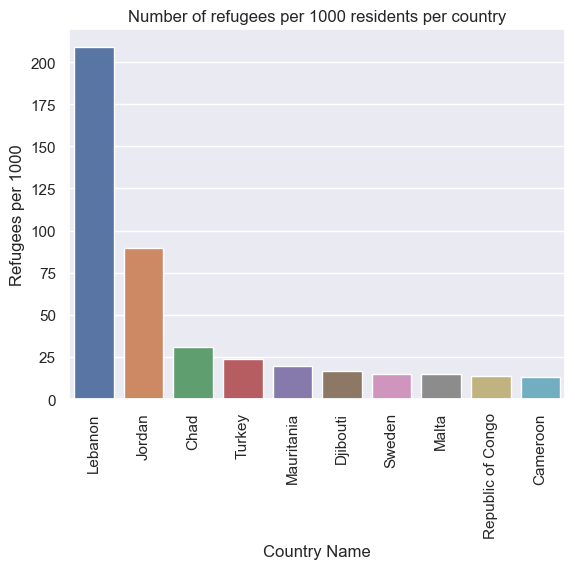

In [63]:
sns.barplot(x = top10rp1000.index, y = top10rp1000)
plt.xticks(rotation = 90)
plt.title("Number of refugees per 1000 residents per country")

G: Countries shown in a bar graph with the highest refugee population per 1000 people. 

In [64]:
mergedpop.loc["Netherlands"]

Population            17134872.00
Yearly Change (%)            0.22
Net Change               37742.00
Density (P/Km²)            508.00
Land Area (Km²)          33720.00
Net Migrants             16000.00
Refugees per 1000            4.89
Refugees in (2016)      101744.00
Refugees in (2015)       82494.00
Refugees in (2014)       82494.00
Refugees in (2013)       74707.00
Refugees in (2012)       71909.00
Refugees in (2011)       74598.00
Refugees in (2010)       74961.00
Refugees in (2009)       76008.00
Refugees in (2008)       77600.00
Refugees in (2007)       86587.00
Name: Netherlands, dtype: float64

In [65]:
western_europe = mergedpop.loc[["United Kingdom", "France", "Spain", "Portugal", "Belgium", 
                                "Netherlands", "Germany", "Italy", "Norway", "Sweden", "Switzerland", 
                               "Iceland", "Austria", "Czech Republic"]]

N: A dataframe with selected western European nations.

Text(0.5, 1.0, 'Refugees per 1000 people per each Western European nation')

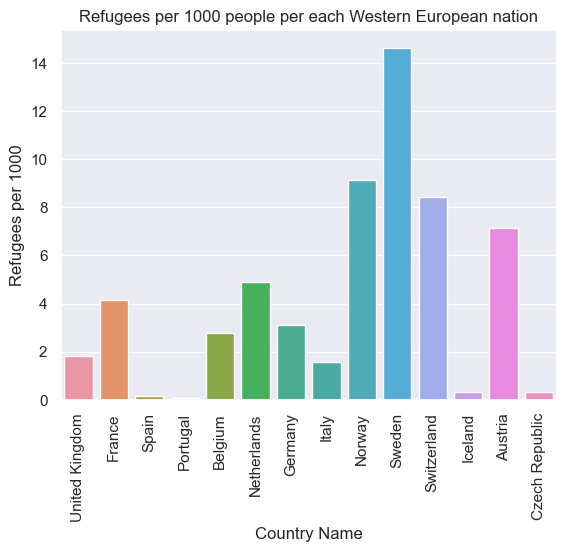

In [66]:
sns.barplot(x = western_europe.index, y = western_europe["Refugees per 1000"])
plt.xticks(rotation = 90)
plt.title("Refugees per 1000 people per each Western European nation")

G: A graph showing refugee density per selected European nations.

Text(0.5, 1.0, 'Number of refugees in each country in 2016')

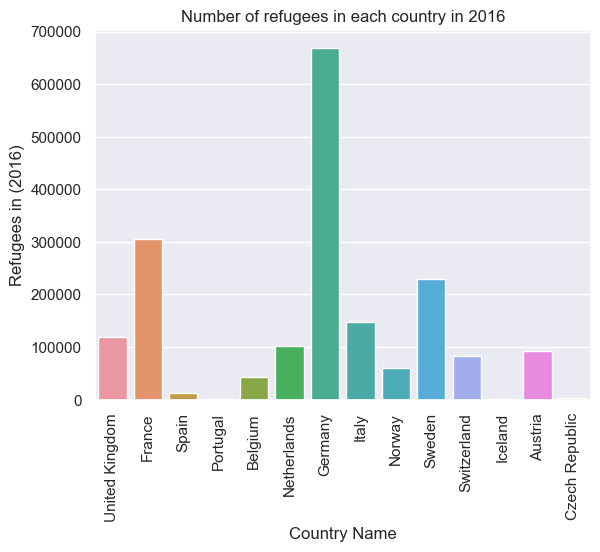

In [67]:
sns.barplot(x = western_europe.index, y = western_europe["Refugees in (2016)"])
plt.xticks(rotation = 90)
plt.title("Number of refugees in each country in 2016")

G: Selected western European countries with the most refugees coming to their country in 2016. 

Text(0.5, 1.0, 'Number of refugees in each country in 2008')

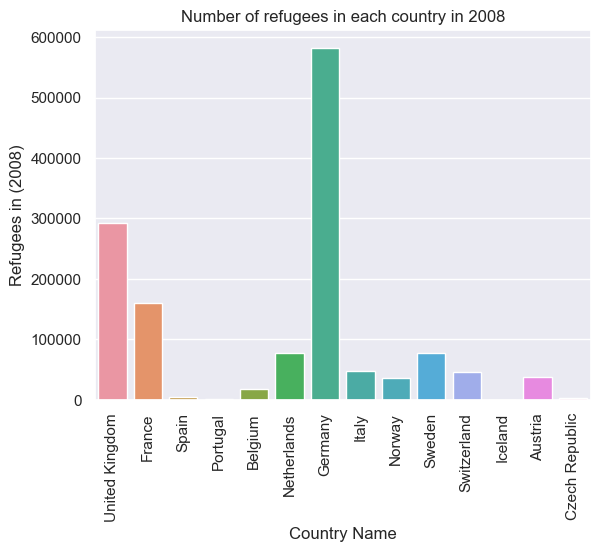

In [68]:
sns.barplot(x = western_europe.index, y = western_europe["Refugees in (2008)"])
plt.xticks(rotation = 90)
plt.title("Number of refugees in each country in 2008")

G: Selected western European countries with the most refugees coming to their country in 2008. 

Text(0.5, 1.0, 'Population per Western European nation')

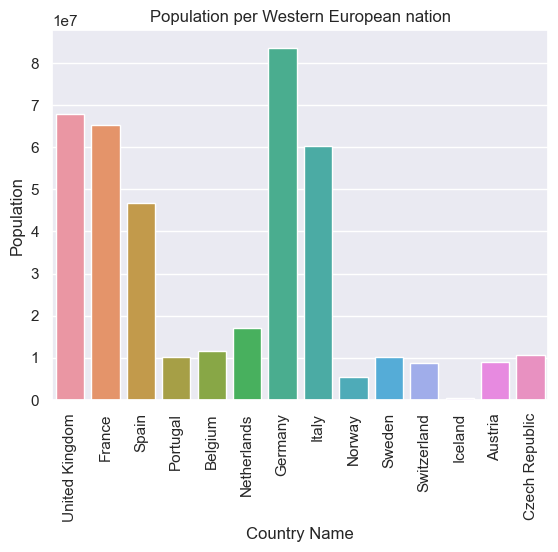

In [69]:
sns.barplot(x = western_europe.index, y = western_europe["Population"])
plt.xticks(rotation = 90)
plt.title("Population per Western European nation")

G: Selected western European countries by their population. 

In [70]:
mergedpop.loc["Bosnia and Herzegovina"]

Population            3280819.00
Yearly Change (%)          -0.61
Net Change             -20181.00
Density (P/Km²)            64.00
Land Area (Km²)         51000.00
Net Migrants           -21585.00
Refugees per 1000           1.78
Refugees in (2016)       5271.00
Refugees in (2015)       6805.00
Refugees in (2014)       6890.00
Refugees in (2013)       6926.00
Refugees in (2012)       6903.00
Refugees in (2011)       6933.00
Refugees in (2010)       7016.00
Refugees in (2009)       7132.00
Refugees in (2008)       7257.00
Refugees in (2007)       7367.00
Name: Bosnia and Herzegovina, dtype: float64

In [71]:
eastern_europe = mergedpop.loc[["Estonia", "Latvia", "Lithuania", "Belarus", "Ukraine", "Romania", 
                               "Bosnia and Herzegovina", "Bulgaria", "Poland", "Slovakia", "Serbia", 
                               "Hungary", "North Macedonia", "Greece", "Albania"]]

N: A dataframe with selected eastern European nations.

Text(0.5, 1.0, 'Refugees in 2016 per Eastern European nation')

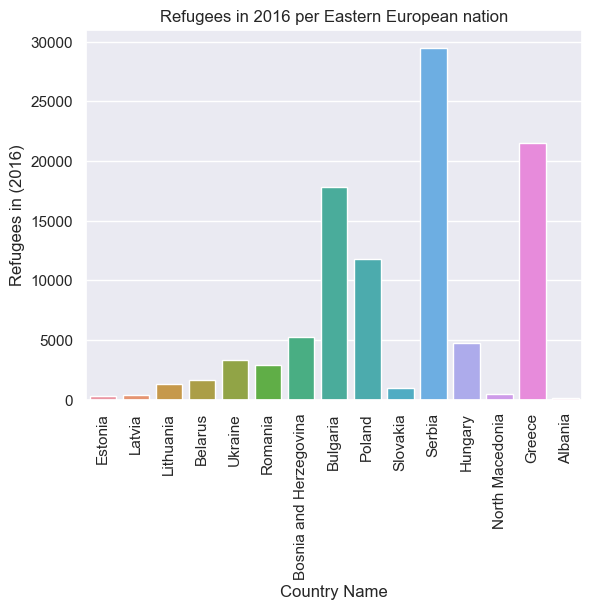

In [72]:
sns.barplot(x = eastern_europe.index, y = eastern_europe["Refugees in (2016)"])
plt.xticks(rotation = 90)
plt.title("Refugees in 2016 per Eastern European nation")

G: Selected eastern European countries with the most refugees coming to their country in 2016.

Text(0.5, 1.0, 'Refugees in 2008 per Eastern European nation')

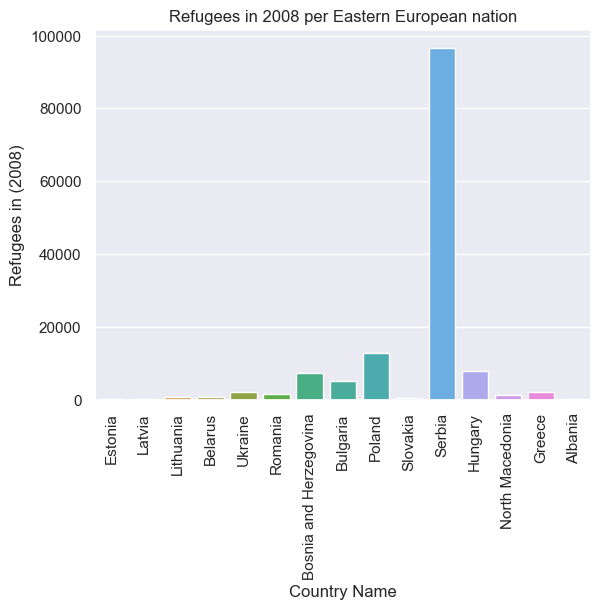

In [73]:
sns.barplot(x = eastern_europe.index, y = eastern_europe["Refugees in (2008)"])
plt.xticks(rotation = 90)
plt.title("Refugees in 2008 per Eastern European nation")

G: Selected western European countries with the most refugees coming to their country in 2008.

Text(0.5, 1.0, 'Population per Western European nation')

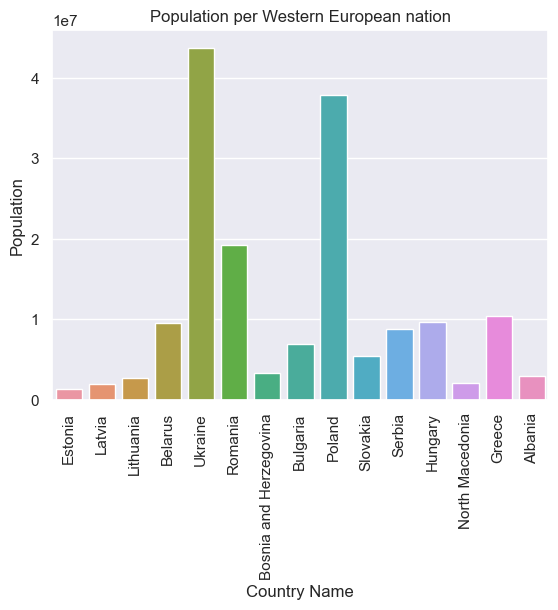

In [74]:
sns.barplot(x = eastern_europe.index, y = eastern_europe["Population"])
plt.xticks(rotation = 90)
plt.title("Population per Western European nation")

G: Population of selected eastern European nations. 

In [75]:
frames = [western_europe, eastern_europe]
europe = pd.concat(frames, axis = 0, join = "outer")
print(europe)

                        Population  Yearly Change (%)  Net Change  \
Country Name                                                        
United Kingdom            67886011               0.53      355839   
France                    65273511               0.22      143783   
Spain                     46754778               0.04       18002   
Portugal                  10196709              -0.29      -29478   
Belgium                   11589623               0.44       50295   
Netherlands               17134872               0.22       37742   
Germany                   83783942               0.32      266897   
Italy                     60461826              -0.15      -88249   
Norway                     5421241               0.79       42384   
Sweden                    10099265               0.63       62886   
Switzerland                8654622               0.74       63257   
Iceland                     341243               0.65        2212   
Austria                    9006398

Text(0.5, 1.0, 'Rufugee comparison between Eastern Europe and Western Europe')

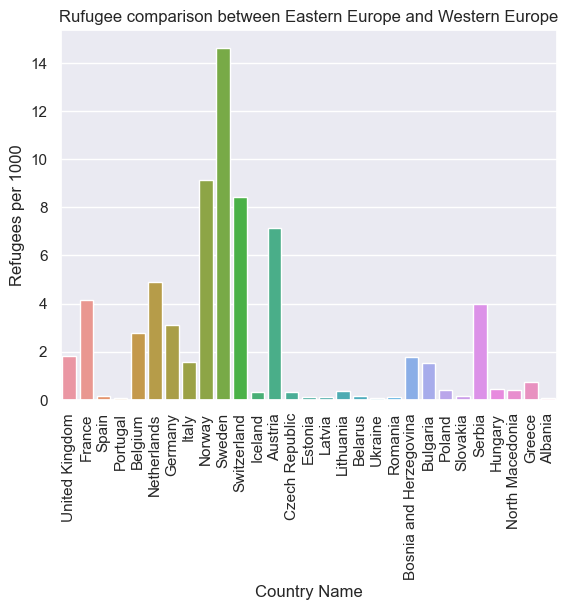

In [76]:
sns.barplot(x = europe.index, y = europe["Refugees per 1000"])
plt.xticks(rotation = 90)
plt.title("Rufugee comparison between Eastern Europe and Western Europe")

G: Graphic comparing between western European nations vs eastern European nations. 

In [77]:
mergedpop.to_csv(r"C:\Users\georg\Desktop\Data Centre\DataPython\refugee_mergedpop.csv", index = True, header = True)

In [79]:
rbo.fillna(value = 1, inplace = True)

In [80]:
rbo.to_csv(r"C:\Users\georg\Desktop\Data Centre\DataPython\refugee_by_origin.csv", index = True, header = True)